# Image Splitting
The goal of this Jupyter notebook is to split a large image (e.g., from a smartphone camera) into $N$ smaller blocks.

In [5]:
import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from copy import deepcopy
import json

In [41]:
PATH = "./data_orange_peels/15/"
data = [f for f in os.listdir(PATH) if f.startswith("IMG")]
# image = cv2.cvtColor(cv2.imread(os.path.join(PATH, random.choice(data))), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(cv2.imread(os.path.join(PATH, "IMG_6518.JPG")), cv2.COLOR_BGR2RGB)

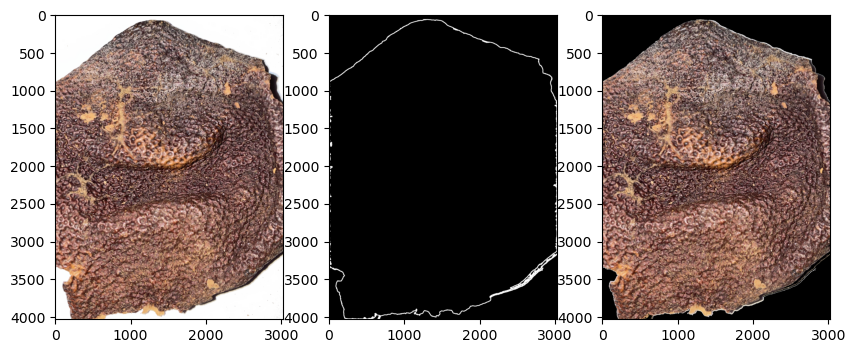

In [42]:
cnt = utils.find_object_boundary_canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), dilate_size=3)
masked = utils.draw_masked_image(image, cnt)

boundary = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.drawContours(boundary, [cnt], 0, 255, 10)
fig, axes = plt.subplots(1, 3, figsize=(10, 8))
axes[0].imshow(image)
axes[1].imshow(boundary, cmap="gray")
axes[2].imshow(masked)

Shape: (504, 378, 3)
Threshold: 285768.0


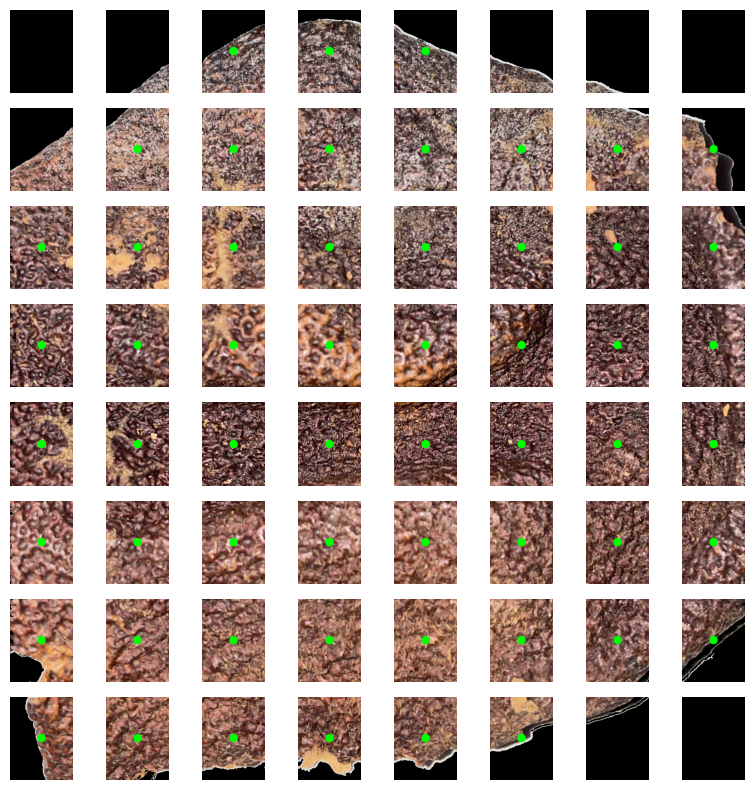

In [43]:
NSPLITS = 8
images = utils.split_image(masked, NSPLITS)
fig, axes = plt.subplots(NSPLITS, NSPLITS, figsize=(8, 8))
for i in range(NSPLITS):
    for j in range(NSPLITS):
        temp = deepcopy(images[i*NSPLITS+j])
        thresh = 0.5*np.product(temp.shape)
        if np.sum(temp == 0) < thresh:
            cv2.circle(temp, (temp.shape[1]//2, temp.shape[0]//2), 25, (0, 255, 0), -1)
        axes[i, j].imshow(temp)
        axes[i, j].axis("off")
print("Shape:", temp.shape)
print("Threshold:", thresh)
fig.tight_layout()

In [44]:
# load JSON file
with open("replications.json", "r") as f:
    replications = json.load(f)

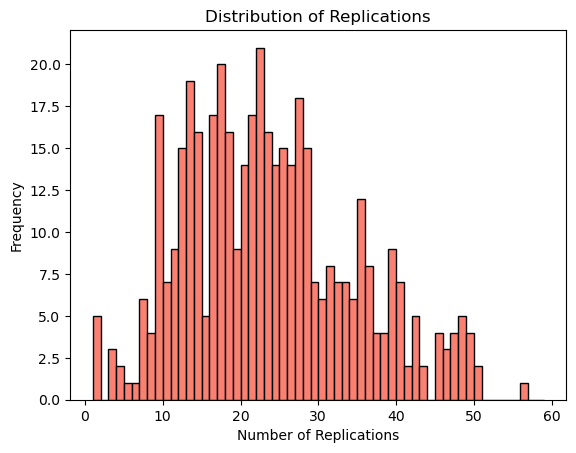

Mean: 22.548098434004473


In [45]:
r = []
for k, v in replications.items():
    r.append(v)
plt.hist(r, bins=range(1, 60), color="salmon", edgecolor="black")
plt.xlabel("Number of Replications")
plt.ylabel("Frequency")
plt.title("Distribution of Replications")
plt.show()
r = np.array(r)
print("Mean:", np.mean(r))

In [46]:
# find the most replicated image
max_replications = max(replications.values())
for k, v in replications.items():
    if v == max_replications:
        print(k, max_replications)

IMG_6518.JPG 56


In [47]:
total = 0
for subdir in os.listdir("./data_orange_peels_split/"):
    if subdir.startswith("replications"):
        continue
    total += len(os.listdir(os.path.join("./data_orange_peels_split/", subdir)))
print("Replications:", total)

Replications: 10079


In [48]:
total = 0
for subdir in os.listdir("./data_orange_peels/"):
    if subdir.startswith("replications"):
        continue
    total += len(os.listdir(os.path.join("./data_orange_peels/", subdir)))
print("Total:", total)

Total: 451
